<a href="https://colab.research.google.com/github/zozo123/QC-IL/blob/master/notebooks/Classical_fast_Fourier_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dowloading the audio file of Lisa and Bart from the Simpsons

In [169]:
!wget http://www.wavsource.com/snds_2018-06-03_5106726768923853/tv/simpsons/misc/multi_aahh.wav -O bart_and_lisa.wav

--2020-03-20 05:04:28--  http://www.wavsource.com/snds_2018-06-03_5106726768923853/tv/simpsons/misc/multi_aahh.wav
Resolving www.wavsource.com (www.wavsource.com)... 162.215.248.209
Connecting to www.wavsource.com (www.wavsource.com)|162.215.248.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21100 (21K) [audio/x-wav]
Saving to: ‘bart_and_lisa.wav’

bart_and_lisa.wav   100%[===================>]  20.61K  --.-KB/s    in 0.06s   

2020-03-20 05:04:28 (355 KB/s) - ‘bart_and_lisa.wav’ saved [21100/21100]



We add `!` before any Linux Shell command. For example, to list all the files in directory we run `!ls` 

In [170]:
!ls


bart_and_lisa.wav  Yamaha-V50-Ride-Pattern-120bpm.wav
bear_growl.wav	   Yamaha-V50-Ride-Pattern-120bpm.wav.1
bird_chirp.wav	   Yamaha-V50-Ride-Pattern-120bpm.wav.2
file.wav	   Yamaha-V50-Ride-Pattern-120bpm.wav.3
sample_data	   Yamaha-V50-Ride-Pattern-120bpm.wav.4


If we run `!pwd` we will print to the screen the current working directory.

In [171]:
!pwd

/content


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile as wav
from scipy.fftpack import fft,fftfreq
import numpy as np
from IPython.display import Audio

sns.set(font_scale=1.5)
sns.set_style("ticks")

Reading the audio file

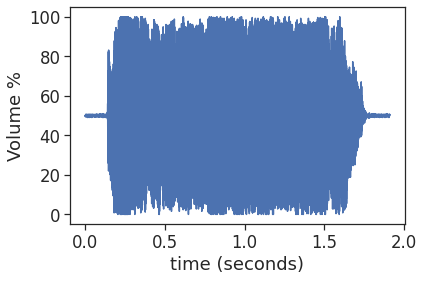

In [184]:
rate, data = wav.read('/content/bart_and_lisa.wav')
plt.plot(np.linspace(0,data.shape[0]/rate,data.shape[0]),100.0*data/np.max(data))
plt.xlabel('time (second)')
plt.ylabel('Volume %')

Audio(data, rate=int(rate))

Fourier Transform has a fast classical implementaion called FFT. Fourier Transform find the harmonies of sound signals.

Hz is the name of the unit $\frac{1}{\text{second}}$.

Text(0, 0.5, 'Energy')

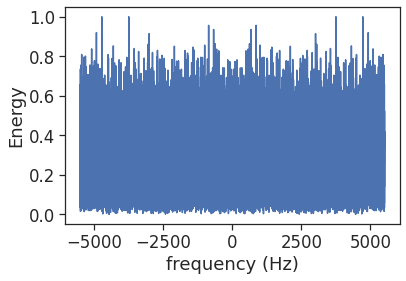

In [193]:
sp = fft(data)
freqs = fftfreq(data.shape[0],1/rate)
abs_sig = np.abs(sp)
abs_sig[abs_sig>=np.max(abs_sig)-0.01] = 0
plt.plot(freqs,abs_sig/np.max(abs_sig))
plt.xlabel('frequency (Hz)')
plt.ylabel('Energy')

White noise has all the harmonises (all the spectrum) in eqaul probability

In [0]:
def plot_fft(data, rate):
  sp = fft(data)
  freqs = fftfreq(data.shape[0],1/rate)
  abs_sig = np.abs(sp)
  abs_sig[abs_sig>=np.max(abs_sig)-0.01] = 0
  plt.plot(freqs,abs_sig)
  plt.xlabel('frequency (Hz)')
  plt.ylabel('Energy')

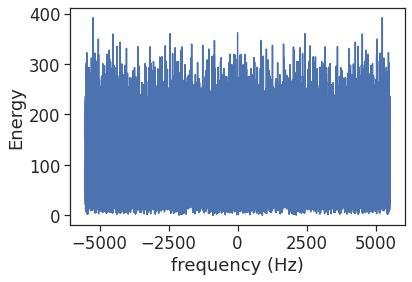

In [199]:
data = np.random.uniform(-1,1,44100) # 44100 random samples between -1 and 1
max_int16 = 32767
scaled = np.int16(data/np.max(np.abs(data)) * max_int16)
plot_fft(data,rate)
Audio(scaled, rate=44100)

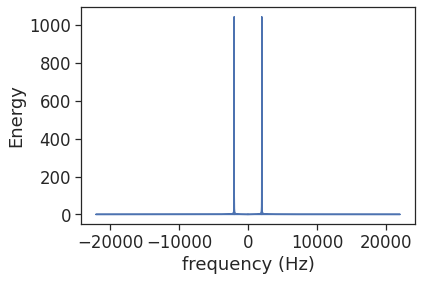

In [201]:
rate=44100 #Hz
t=np.linspace(0,1,rate)
f=2000
omega = 2*np.pi*f
data = np.sin(omega*t) 
scaled = np.int16(data/np.max(np.abs(data))* 32767)

plot_fft(data,rate)
Audio(scaled, rate=rate)

NameError: ignored